In [67]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Resized Dimensions :  (180, 129, 4)


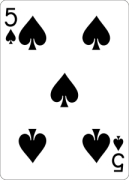

In [73]:

url =  "https://i1.wp.com/zermilaninsandali.com/wp-content/uploads/2021/01/maca5.png?resize=215%2C300&ssl=1"

# Read and display the image

image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

scale_percent = 60 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
resized2 = cv.resize(image_2, dim, interpolation = cv.INTER_AREA)

 
print('Resized Dimensions : ',resized.shape)
cv2_imshow(resized) 


In [88]:
#kartın ortasından olacak şekilde perspektifini bozdum
new_width = 400
new_height = 400

pts1 = np.float32([[80,0],[166,0],[0,238],[171,238]])
pts2 = np.float32([[0,0],[0,height],[width,0],[width,height]])

matrices = cv.getPerspectiveTransform(pts1,pts2)
print(matrices)


[[ 1.66208827e-16  1.07773109e+00 -2.11327252e-14]
 [ 2.09302326e+00  7.03537229e-01 -1.67441860e+02]
 [ 9.86864911e-19  4.15282392e-03  1.00000000e+00]]


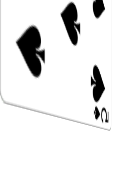

In [89]:
img_output = cv.warpPerspective(resized,matrices,(width,height))
cv2_imshow(img_output)